In [11]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt

In [3]:
model = tf.keras.models.load_model('cat_dog_classifier.h5')
model.summary()

C:\Users\prash\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [21]:
def make_prediction(img):
    if hasattr(img, 'read'):
        img = Image.open(img)  # Changed: Open image if it's a file-like object
    elif isinstance(img, np.ndarray):
        img = Image.fromarray(img)  # Changed: Convert numpy array to PIL image
    else:
        raise ValueError("Input must be either a file-like object or a numpy array.")
    
    img = img.resize((150, 150))  # Changed: Resize directly using PIL
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    if prediction[0][0] > 0.5:
        return "Dog"
    else:
        return "Cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: [[0.14543203]]


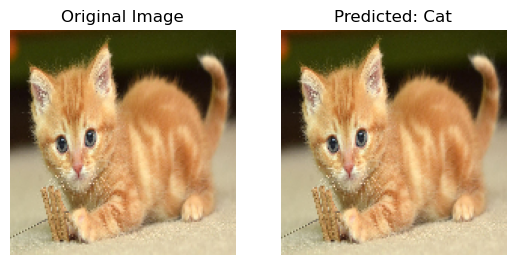

In [13]:
make_prediction(r'Resource\cat.jpg')

# Install Gradio in your machine if it is already installed ignore below cell

In [16]:
import gradio as gr

In [24]:
interface = gr.Interface(
    fn=make_prediction,
    inputs="image",
    outputs="text",
    title="Cat-Dog Classifier",
    description="Upload an image of either a cat or a dog."
)

In [25]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://d2d1db1a26454983b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: [[0.98814166]]


C:\Users\prash\AppData\Local\Temp\ipykernel_14332\3713693946.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
Traceback (most recent call last):
  File "C:\Users\prash\anaconda3\Lib\site-packages\gradio\queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prash\anaconda3\Lib\site-packages\gradio\route_utils.py", line 270, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prash\anaconda3\Lib\site-packages\gradio\blocks.py", line 1887, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prash\anaconda3\Lib\site-packages\gradio\blocks.py", line 1472, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: [[0.80532354]]


C:\Users\prash\AppData\Local\Temp\ipykernel_14332\3713693946.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
